# CS 5228


In [1]:
import pandas as pd
import locale
import numpy as np

locale.setlocale(locale.LC_ALL,'')
pd.set_option('display.max_columns', None)

df_original = pd.read_csv("dataset/Xtrain.csv",dtype= {'Zip': 'object', 'NAICS':'object',
                                              'NewExist':'object', 'FranchiseCode':'object',
                                              'UrbanRural':'object'}, parse_dates=['ApprovalDate','DisbursementDate'])
y_train = pd.read_csv("dataset/Ytrain.csv")
df_original = pd.concat([df_original, y_train['ChargeOff']], axis = 1)

def data_preprocessing(df):
    
    # Drop column
    df = df.drop(columns=['BalanceGross'])

    # Process Date
    df.loc[(df['ApprovalDate'].dt.year >=2020), 'ApprovalDate'] = df['ApprovalDate'] - pd.DateOffset(years=100)
    df.loc[(df['DisbursementDate'].dt.year >=2020), 'DisbursementDate'] = df['DisbursementDate'] - pd.DateOffset(years=100)

    # Process categorical columns for NaN
    df.loc[(df['NewExist'] != "1.0") & (df['NewExist'] != "2.0"), 'NewExist'] = np.NaN
    df['NewExist'] = df['NewExist'].str.strip('.0')

    df.loc[(df['FranchiseCode']=='0') | (df['FranchiseCode']=='1'), 'FranchiseCode'] = '0'
    df.loc[(df['RevLineCr']!='Y'), 'RevLineCr'] = 'N'
    df.loc[(df['LowDoc']!='Y') & (df['LowDoc']!='N'), 'LowDoc'] = np.NaN

    # Process Numberic 
    df['DisbursementGross']= pd.to_numeric(df['DisbursementGross'].map(lambda x: locale.atof(x.strip('$').replace(',','').replace(' ',''))),downcast='float')
    df['GrAppv']= pd.to_numeric(df['GrAppv'].map(lambda x: locale.atof(x.strip('$').replace(',','').replace(' ',''))),downcast='float')
    df['SBA_Appv']= pd.to_numeric(df['SBA_Appv'].map(lambda x: locale.atof(x.strip('$').replace(',','').replace(' ',''))),downcast='float')

    return df

def one_hot_encoding(df):
    NewExist_dummy = pd.get_dummies(df['NewExist'], prefix='NewExist')
    UrbanRural_dummy = pd.get_dummies(df['UrbanRural'], prefix='UrbanRural')
    RevLineCr_dummy = pd.get_dummies(df['RevLineCr'], prefix='RevLineCr')
    LowDoc_dummy = pd.get_dummies(df['LowDoc'], prefix='LowDoc')

    df = pd.concat([df, NewExist_dummy, UrbanRural_dummy, RevLineCr_dummy, LowDoc_dummy], axis = 1)
    df = df.drop(['NewExist', 'UrbanRural', 'RevLineCr', 'LowDoc', "Id"], axis=1)
    
    return df

df1 = data_preprocessing(df_original)

df2 = df1.dropna()
df3 = df1.fillna('Unknown')

df4 = one_hot_encoding(df2)
df5 = one_hot_encoding(df3)

df1.head(10)


,Id,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,ChargeOff
0,0,"NPE Realty, LLC",Pembroke Pines,FL,33027,"TD BANK, NATIONAL ASSOCIATION",DE,334516,2010-04-16,2010,130,25,1,2,0,0,1,N,N,2010-05-01,2000000.0,2000000.0,1500000.0,0
1,1,"KEVCO CONSTRUCTION, LLC",SANDY,UT,84094,ZIONS FIRST NATIONAL BANK,UT,236115,2010-01-30,2010,33,6,1,1,3,0,1,N,N,2010-02-01,17000.0,17000.0,17000.0,1
2,2,EAST L A SHOE REPAIR,LOS ANGELES,CA,90022,BANK OF AMERICA NATL ASSOC,NC,811430,2002-07-29,2002,60,1,1,1,1,0,1,Y,N,2002-08-31,17000.0,17000.0,8500.0,0
3,3,"RUSSLER, DANIEL C, MD",LODI,WI,53555,ASSOCIATED BANK NATL ASSOC,WI,0,1994-06-10,1994,160,1,2,0,0,0,0,N,N,1994-07-31,137000.0,137000.0,123300.0,0
4,4,AFFORDABLE FAMILY DENISTRY LLC,LEBANON,MO,65536,COMMERCE BANK,MO,621210,2006-02-06,2006,101,2,1,7,2,0,1,N,N,2006-03-31,46665.0,25000.0,12500.0,0
5,5,COPPER COIN DISCOUNT LIQUOR,PAGOSA SPRINGS,CO,81147,FIRST SOUTHWEST BANK,CO,445310,2008-01-17,2008,272,3,1,1,2,0,2,N,N,2008-05-31,400000.0,500000.0,375000.0,1
6,6,NICHOLAS MIRABELLA AND PAUL ST,LAS VEGAS,NV,89116,WELLS FARGO BANK NATL ASSOC,SD,811310,2002-09-06,2002,300,5,1,5,5,0,1,N,N,2002-10-31,275000.0,275000.0,206250.0,0
7,7,SA SA LLC,ELLICOTT CITY,MD,21043,HOWARD BANK,MD,423940,2010-01-15,2010,106,1,2,0,1,0,2,N,N,2010-02-01,75000.0,75000.0,67500.0,1
8,8,MICHAEL D CAIN & JANET H CAIN,CONCORD,CA,94518,BANK OF AMERICA NATL ASSOC,NY,621210,1999-12-02,2000,300,5,1,0,5,0,1,N,N,1999-12-31,699300.0,699300.0,524475.0,0
9,9,Hoke Trucking Ltd.,Acranum,OH,45304,CALIFORNIA BANK & TRUST,CA,484121,2007-01-19,2007,10,15,1,5,15,0,2,N,N,2007-01-31,100000.0,100000.0,50000.0,1


In [2]:
df1.describe(include='all')

,Id,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,GrAppv,SBA_Appv,ChargeOff
count,50000.000000,49999,50000,50000,50000,49924,49923,50000,50000,50000,50000.000000,50000.000000,49964,50000.00000,50000.000000,50000,50000,50000,49648,49881,5.000000e+04,5.000000e+04,5.000000e+04,50000.000000
unique,NaN,48756,9488,51,13794,2783,52,1118,6934,47,NaN,NaN,2,NaN,NaN,848,3,2,2,2433,NaN,NaN,NaN,NaN
top,NaN,SUBWAY,LOS ANGELES,CA,90015,BANK OF AMERICA NATL ASSOC,CA,0,2004-01-30 00:00:00,2007,NaN,NaN,1,NaN,NaN,0,1,N,N,2007-04-30 00:00:00,NaN,NaN,NaN,NaN
freq,NaN,55,814,7400,84,5895,7257,8844,53,6228,NaN,NaN,35636,NaN,NaN,47275,30059,36711,44714,591,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969-04-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1969-05-22 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-14 00:00:00,NaN,NaN,NaN,NaN
mean,24999.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.856540,9.475280,NaN,9.98176,12.441680,NaN,NaN,NaN,NaN,NaN,1.740080e+05,1.640501e+05,1.242661e+05,0.496960
std,14433.901067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.066175,59.702302,NaN,266.95799,267.466654,NaN,NaN,NaN,NaN,NaN,2.615771e+05,2.616304e+05,2.080550e+05,0.499996
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2.000000e+02,1.000000e+02,0.000000
25%,12499.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.000000,2.000000,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,3.500000e+04,2.500000e+04,1.566000e+04,0.000000


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
Id                   50000 non-null int64
Name                 49999 non-null object
City                 50000 non-null object
State                50000 non-null object
Zip                  50000 non-null object
Bank                 49924 non-null object
BankState            49923 non-null object
NAICS                50000 non-null object
ApprovalDate         50000 non-null datetime64[ns]
ApprovalFY           50000 non-null object
Term                 50000 non-null int64
NoEmp                50000 non-null int64
NewExist             49964 non-null object
CreateJob            50000 non-null int64
RetainedJob          50000 non-null int64
FranchiseCode        50000 non-null object
UrbanRural           50000 non-null object
RevLineCr            50000 non-null object
LowDoc               49648 non-null object
DisbursementDate     49881 non-null datetime64[ns]
DisbursementGross   

In [4]:
df1.shape

(50000, 24)

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49420 entries, 0 to 49999
Data columns (total 24 columns):
Id                   49420 non-null int64
Name                 49420 non-null object
City                 49420 non-null object
State                49420 non-null object
Zip                  49420 non-null object
Bank                 49420 non-null object
BankState            49420 non-null object
NAICS                49420 non-null object
ApprovalDate         49420 non-null datetime64[ns]
ApprovalFY           49420 non-null object
Term                 49420 non-null int64
NoEmp                49420 non-null int64
NewExist             49420 non-null object
CreateJob            49420 non-null int64
RetainedJob          49420 non-null int64
FranchiseCode        49420 non-null object
UrbanRural           49420 non-null object
RevLineCr            49420 non-null object
LowDoc               49420 non-null object
DisbursementDate     49420 non-null datetime64[ns]
DisbursementGross   

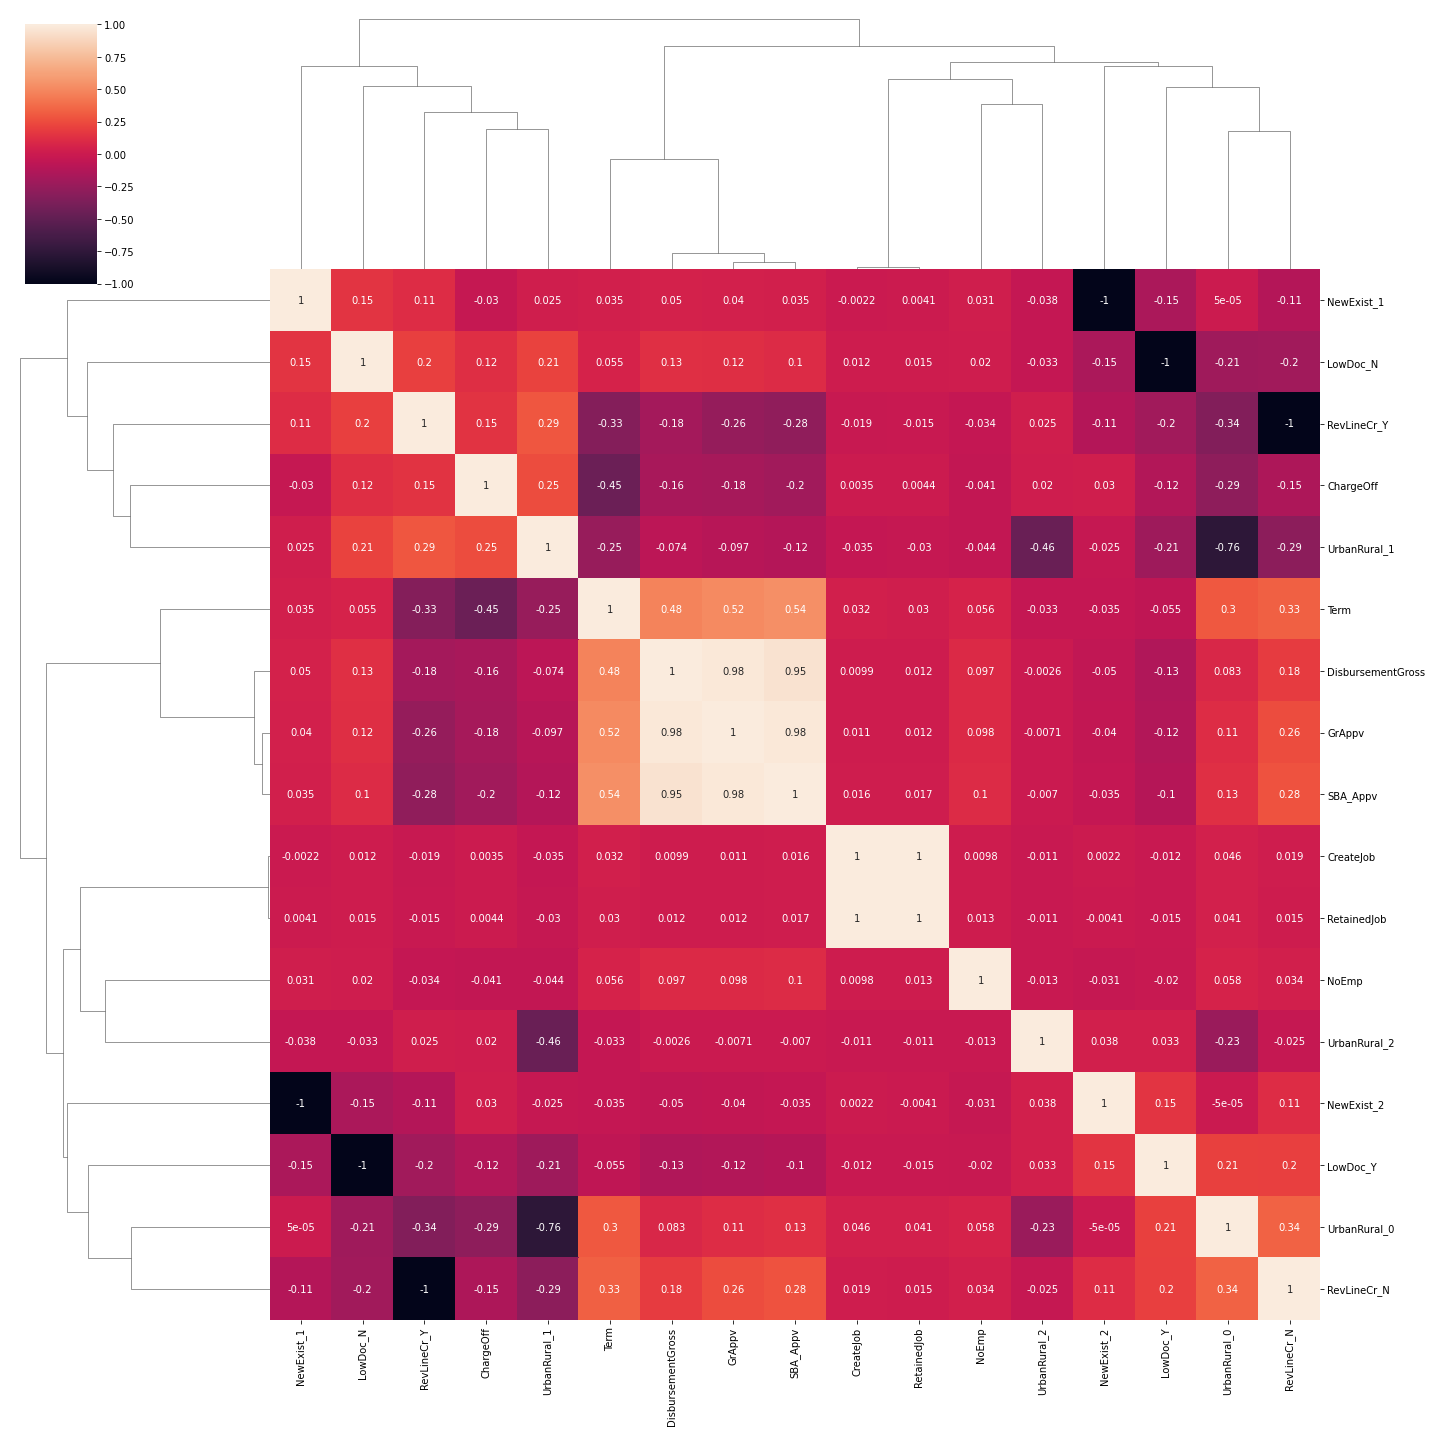

In [6]:
# visualization
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

sb.clustermap(df4.corr(), annot=True, figsize=(20, 20))

# Create Job and Retained Job is highly correlated 

# Low correlation
# ID, Create Job, Retained Job

/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The colNu

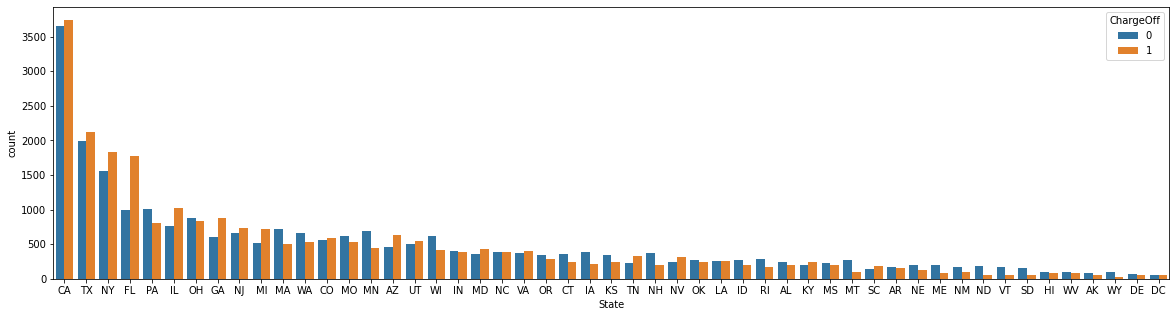

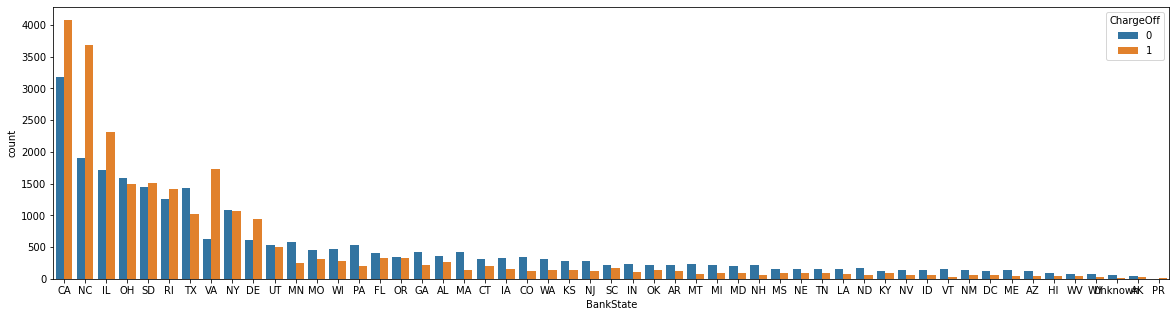

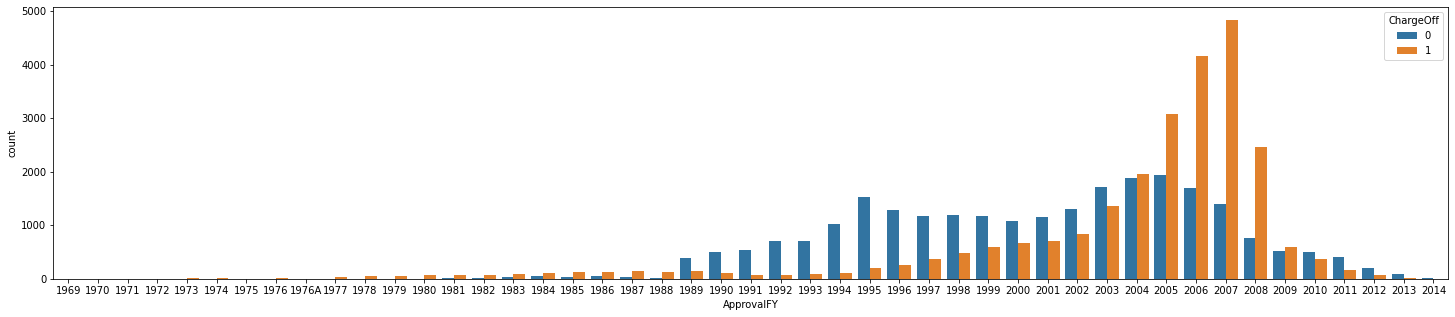

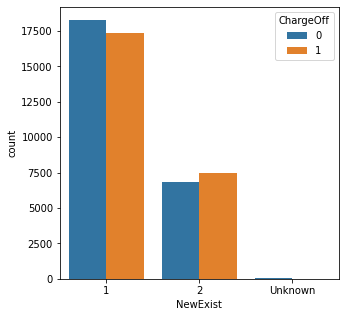

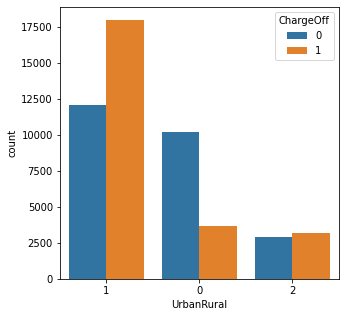

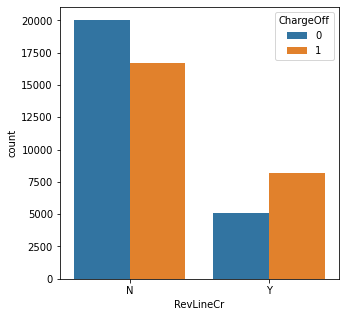

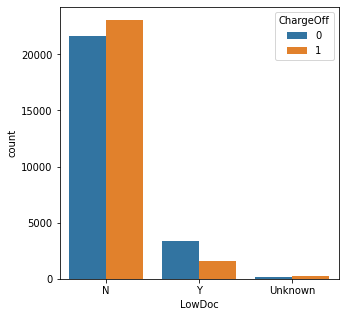

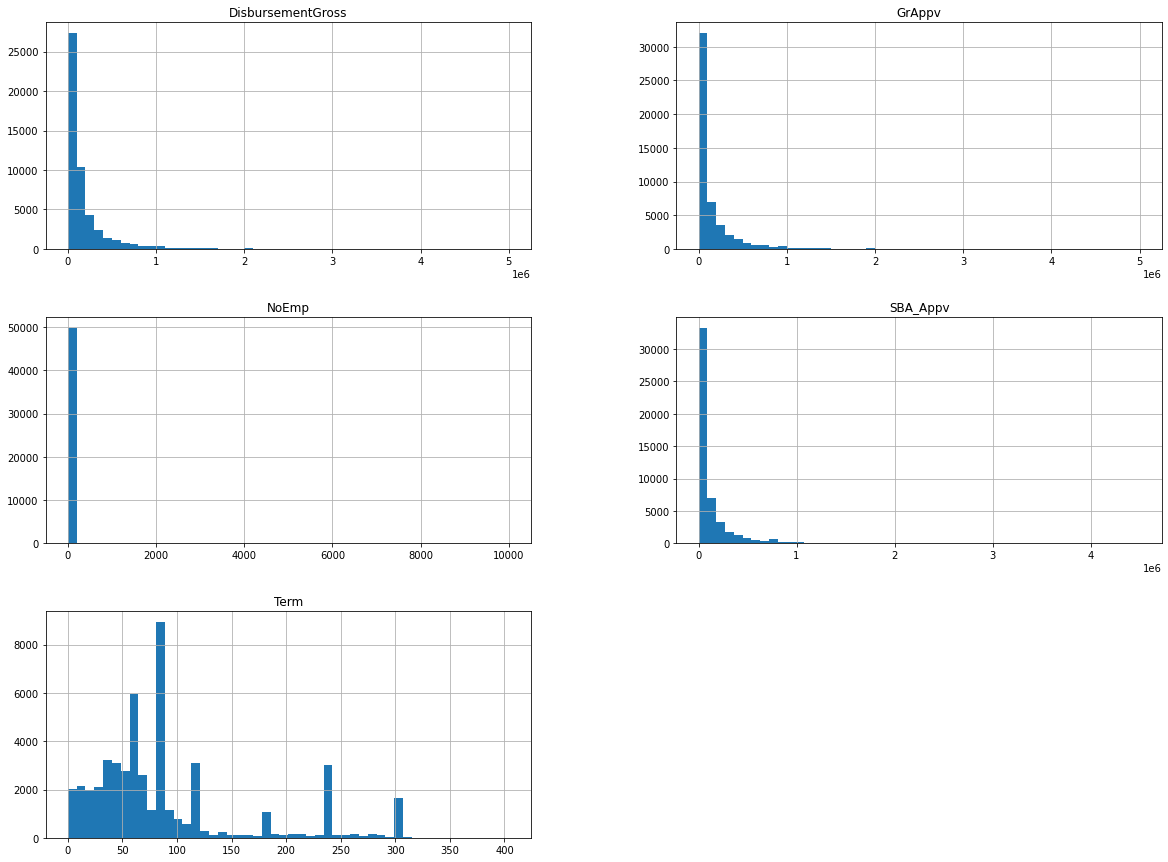

In [7]:
plt.figure(figsize=(20,5))
sb.countplot(x='State', data=df3,order = df3['State'].value_counts().index,hue='ChargeOff');

plt.figure(figsize=(20,5))
sb.countplot(x='BankState', data=df3,order = df3['BankState'].value_counts().index,hue='ChargeOff' );

plt.figure(figsize=(25,5))
sb.countplot(x='ApprovalFY', data=df3.sort_values(by='ApprovalFY'),hue='ChargeOff');

plt.figure(figsize=(5,5))
sb.countplot(x='NewExist', data=df3,order = df3['NewExist'].value_counts().index,hue='ChargeOff' );

plt.figure(figsize=(5,5))
sb.countplot(x='UrbanRural', data=df3,order = df3['UrbanRural'].value_counts().index,hue='ChargeOff' );

plt.figure(figsize=(5,5))
sb.countplot(x='RevLineCr', data=df3,order = df3['RevLineCr'].value_counts().index,hue='ChargeOff' );

plt.figure(figsize=(5,5))
sb.countplot(x='LowDoc', data=df3,order = df3['LowDoc'].value_counts().index,hue='ChargeOff' );

columns_for_plot=['Term','NoEmp','DisbursementGross','GrAppv','SBA_Appv']
df3.hist(bins=50,column = columns_for_plot,figsize=[20,15]);


# outliner for NoEmp

{'whiskers': [<matplotlib.lines.Line2D at 0x12ad23e10>,
 'caps': [<matplotlib.lines.Line2D at 0x12a5c56d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ad23790>],
 'medians': [<matplotlib.lines.Line2D at 0x12aa4e490>],
 'fliers': [<matplotlib.lines.Line2D at 0x12aa4e910>],
 'means': []}

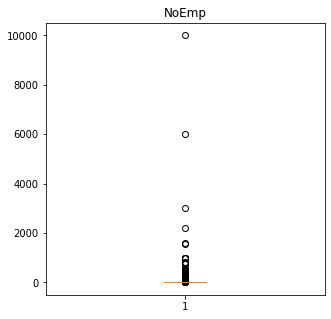

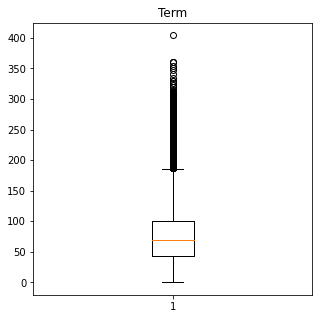

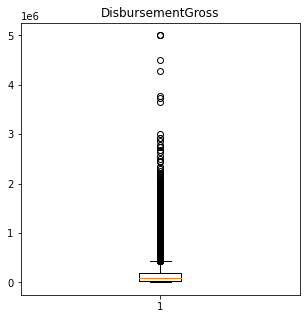

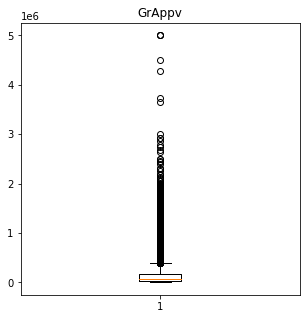

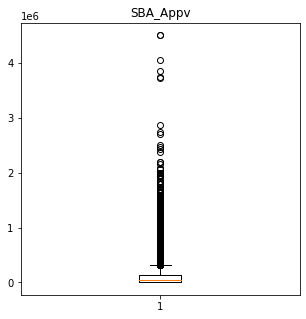

In [15]:
plt.figure(figsize=(5,5))
plt.title('NoEmp')
plt.boxplot(df3['NoEmp'])

plt.figure(figsize=(5,5))
plt.title('Term')
plt.boxplot(df3['Term'])

plt.figure(figsize=(5,5))
plt.title('DisbursementGross')
plt.boxplot(df3['DisbursementGross'])

plt.figure(figsize=(5,5))
plt.title('GrAppv')
plt.boxplot(df3['GrAppv'])

plt.figure(figsize=(5,5))
plt.title('SBA_Appv')
plt.boxplot(df3['SBA_Appv'])



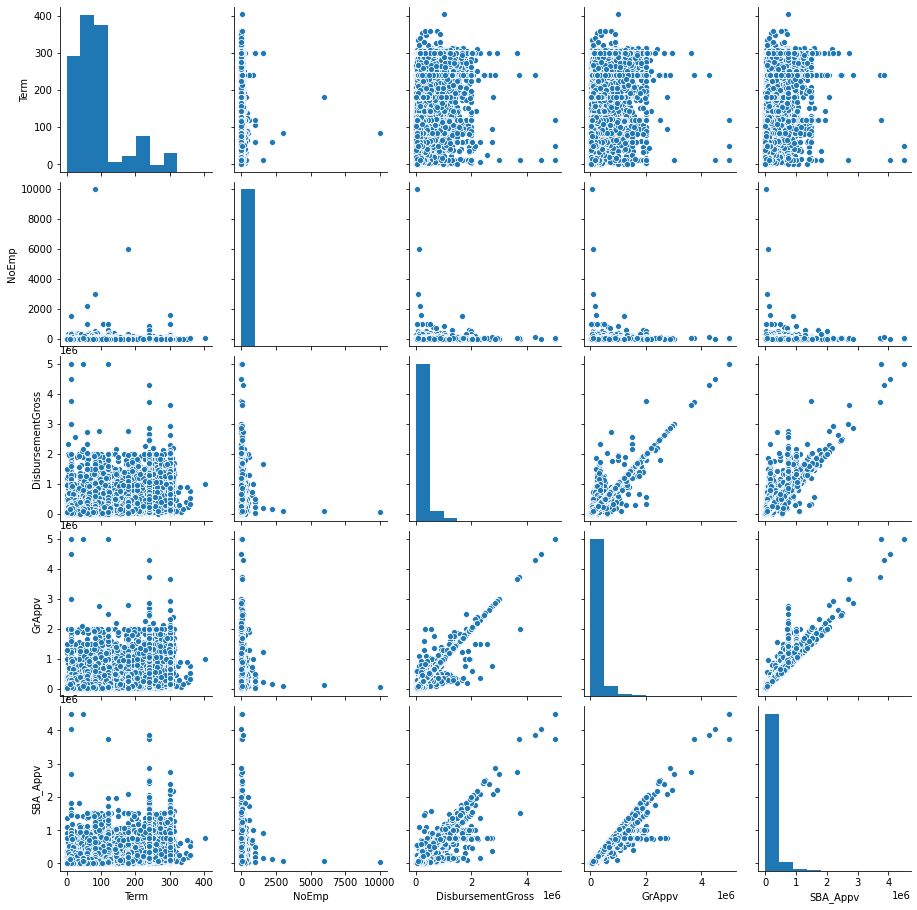

In [18]:
sb.pairplot(df3, vars=columns_for_plot)